# Exploratory Data Analysis

Use this notebook for data exploration.

In [3]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Overview of the Data

In [4]:
# check the shape of the dataset.
df.shape[0], df.shape[1]

(95662, 16)

In [5]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Summary Statistics

In [ ]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Visualize the distribution of the variable Amount

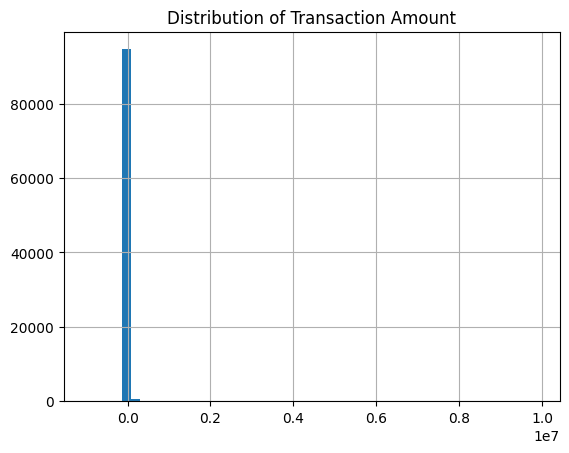

In [7]:
import matplotlib.pyplot as plt

df["Amount"].hist(bins=50)
plt.title("Distribution of Transaction Amount")
plt.show()

## Visualize the distribution of the variable Value

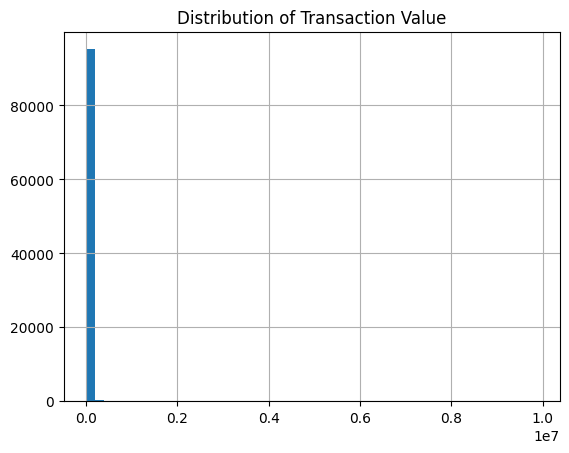

In [ ]:
df["Value"].hist(bins=50)
plt.title("Distribution of Transaction Value")
plt.show()


## : Categorical feature distributions

In [9]:
df["ChannelId"].value_counts()

ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

In [10]:
df["ProductCategory"].value_counts().head(10)

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

## checking Mssing values

In [11]:
df.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## Correlation analysis (numerical)

In [12]:
df[["Amount", "Value", "FraudResult"]].corr()

,Amount,Value,FraudResult
Amount,1.000000,0.989692,0.557370
Value,0.989692,1.000000,0.566739
FraudResult,0.557370,0.566739,1.000000


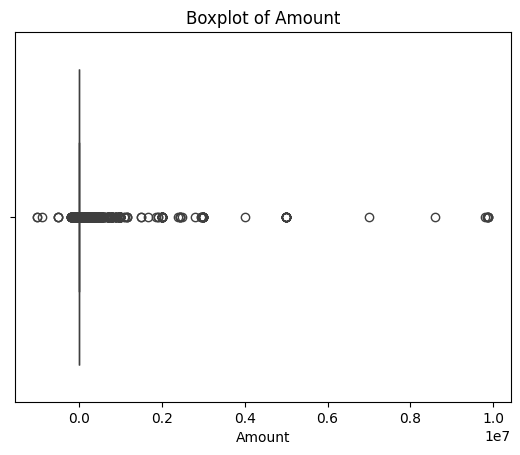

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Amount"])
plt.title("Boxplot of Amount")
plt.show()

In [14]:
import plotly.express as px

fig = px.histogram(df, x='Value', title='Histogram of Value (Plotly Express)')
fig.show()

Top Insights from Data Analysis:
Highly Skewed Financial Data with Significant Outliers (Amount & Value):

Both Amount and Value columns, representing monetary transaction data, exhibit extreme right-skewness. This means the vast majority of transactions are of small value, but a substantial number of transactions (e.g., 9021 outliers in 'Value', approximately 9.4% of the dataset) are significantly larger than the average. This characteristic is critical for any financial modeling or fraud detection, as these large values (outliers) heavily influence the mean and overall distribution.
Moderate Positive Correlation between Transaction Size and Fraud:

There is a moderate positive linear correlation (around 0.56-0.57) between transaction Amount/Value and FraudResult. This is a crucial finding, indicating that larger transactions tend to be more susceptible to fraud. This insight is highly valuable for developing fraud detection strategies, suggesting that transactions with higher amounts or values warrant closer scrutiny.
Limited Predictive Value of CountryCode and PricingStrategy (Numerically):

CountryCode is a constant feature across the entire dataset, offering no variability and thus no linear correlation with any other numerical feature. This suggests it's not a useful numerical predictor within this dataset.
PricingStrategy showed very weak to negligible linear correlation with Amount, Value, and FraudResult (coefficients close to zero). This implies that, in a linear context, the specific pricing strategy used does not strongly influence the transaction size or the likelihood of fraud.

# Task 3 - Feature Engineering

In [15]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])

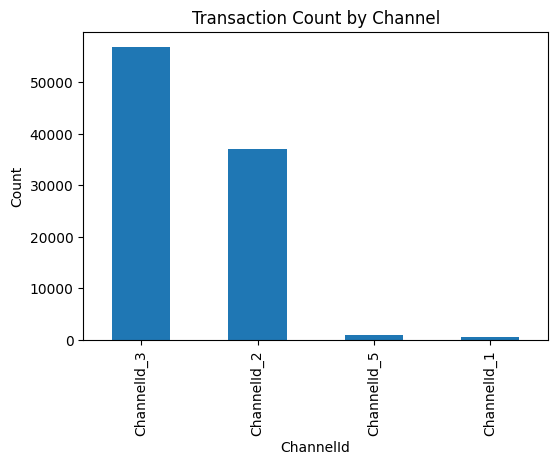

In [16]:
df["ChannelId"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Transaction Count by Channel")
plt.xlabel("ChannelId")
plt.ylabel("Count")
plt.show()

# Build Customer-Level Features

In [ ]:
customer_df = df.groupby("CustomerId").agg(
    total_amount=("Amount", "sum"),
    avg_amount=("Amount", "mean"),
    transaction_count=("TransactionId", "count"),
    active_days=("TransactionStartTime", lambda x: x.dt.date.nunique())
).reset_index()

customer_df.head()


,CustomerId,total_amount,avg_amount,transaction_count,active_days
0,CustomerId_1,-10000.0,-10000.000000,1,1
1,CustomerId_10,-10000.0,-10000.000000,1,1
2,CustomerId_1001,20000.0,4000.000000,5,1
3,CustomerId_1002,4225.0,384.090909,11,6
4,CustomerId_1003,20000.0,3333.333333,6,1


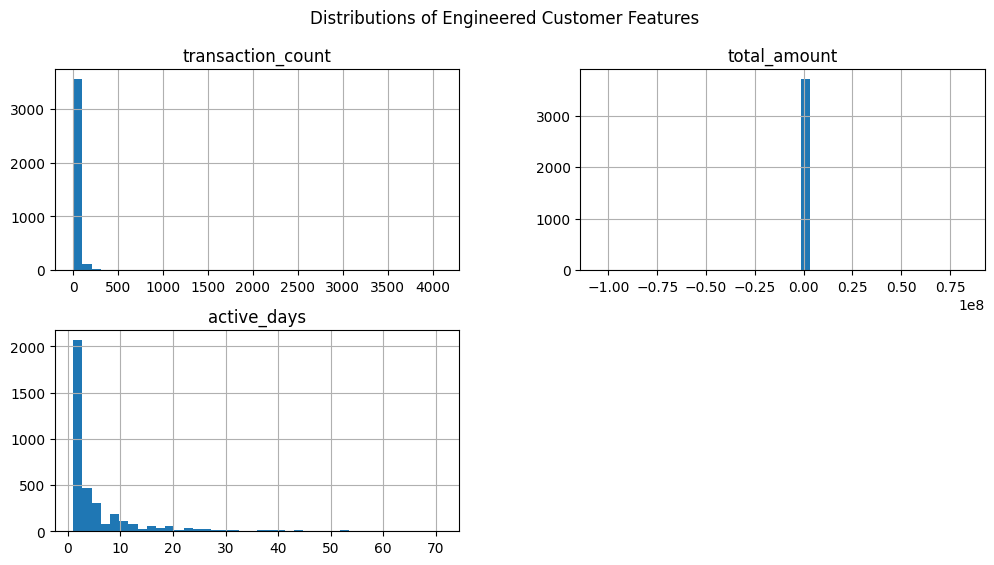

In [18]:
customer_df[["transaction_count", "total_amount", "active_days"]].hist(
    bins=40, figsize=(12,6)
)
plt.suptitle("Distributions of Engineered Customer Features")
plt.show()


In [19]:
df[["Amount", "Value"]].describe()

,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


# Prepare Time Column

In [20]:
import pandas as pd

df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [21]:
reference_date = df['TransactionStartTime'].max()

In [22]:
customer_features = df.groupby('CustomerId').agg(
    transaction_count=('TransactionId', 'count'),
    total_amount=('Amount', 'sum'),
    avg_amount=('Amount', 'mean'),
    last_transaction_date=('TransactionStartTime', 'max')
).reset_index()


In [23]:
customer_features['recency_days'] = (
    reference_date - customer_features['last_transaction_date']
).dt.days

In [24]:
customer_features.describe()

,transaction_count,total_amount,avg_amount,recency_days
count,3742.000000,3.742000e+03,3.742000e+03,3742.000000
mean,25.564404,1.717377e+05,1.571562e+04,30.461251
std,96.929602,2.717305e+06,1.676991e+05,27.118932
min,1.000000,-1.049000e+08,-4.250000e+05,0.000000
25%,2.000000,4.077438e+03,1.000000e+03,5.000000
50%,7.000000,2.000000e+04,2.583846e+03,24.000000
75%,20.000000,7.996775e+04,4.877614e+03,53.000000
max,4091.000000,8.345124e+07,8.601821e+06,90.000000


In [25]:
customer_features.head()

,CustomerId,transaction_count,total_amount,avg_amount,last_transaction_date,recency_days
0,CustomerId_1,1,-10000.0,-10000.000000,2018-11-21 16:49:14+00:00,83
1,CustomerId_10,1,-10000.0,-10000.000000,2018-11-21 16:49:09+00:00,83
2,CustomerId_1001,5,20000.0,4000.000000,2018-11-16 08:20:39+00:00,89
3,CustomerId_1002,11,4225.0,384.090909,2019-01-18 10:05:00+00:00,25
4,CustomerId_1003,6,20000.0,3333.333333,2019-02-01 15:04:51+00:00,11


In [26]:
customer_features.head()

,CustomerId,transaction_count,total_amount,avg_amount,last_transaction_date,recency_days
0,CustomerId_1,1,-10000.0,-10000.000000,2018-11-21 16:49:14+00:00,83
1,CustomerId_10,1,-10000.0,-10000.000000,2018-11-21 16:49:09+00:00,83
2,CustomerId_1001,5,20000.0,4000.000000,2018-11-16 08:20:39+00:00,89
3,CustomerId_1002,11,4225.0,384.090909,2019-01-18 10:05:00+00:00,25
4,CustomerId_1003,6,20000.0,3333.333333,2019-02-01 15:04:51+00:00,11


In [30]:
import pandas as pd
import numpy as np

df_customer = (
    df
    .groupby("CustomerId")
    .agg(
        transaction_count=("TransactionId", "count"),
        total_amount=("Amount", "sum"),
        avg_amount=("Amount", "mean"),
        max_amount=("Amount", "max"),
        min_amount=("Amount", "min")
    )
    .reset_index()
)


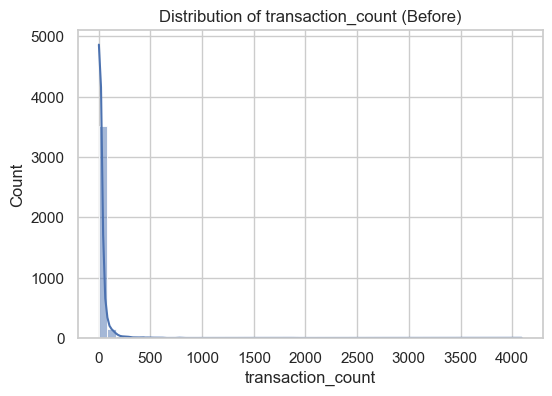

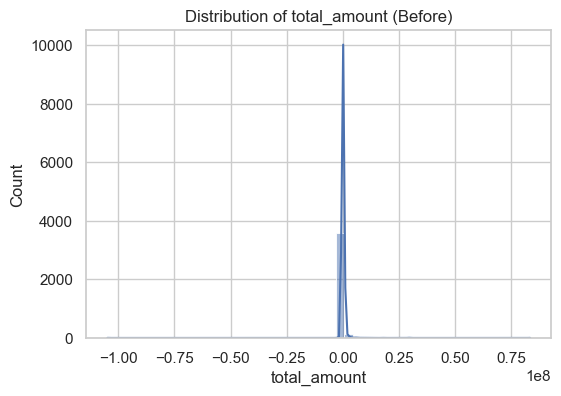

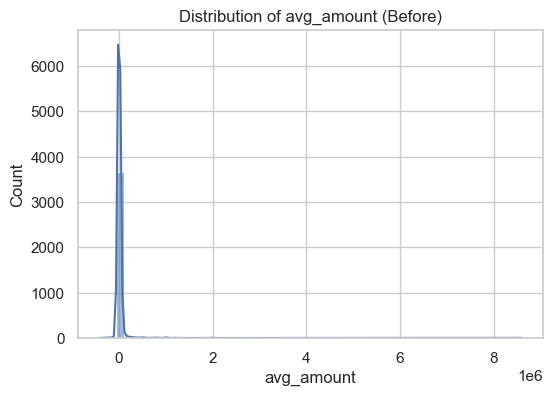

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    "transaction_count",
    "total_amount",
    "avg_amount"
]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_customer[col], bins=50, kde=True)
    plt.title(f"Distribution of {col} (Before)")
    plt.show()


In [32]:
for col in numeric_cols:
    df_customer[f"log_{col}"] = np.log1p(df_customer[col])

C:\Users\Hwendifraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p

C:\Users\Hwendifraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [ ]:
df_customer.head()

,CustomerId,transaction_count,total_amount,avg_amount,max_amount,min_amount,log_transaction_count,log_total_amount,log_avg_amount
0,CustomerId_1,1,-10000.0,-10000.000000,-10000.0,-10000.0,0.693147,NaN,NaN
1,CustomerId_10,1,-10000.0,-10000.000000,-10000.0,-10000.0,0.693147,NaN,NaN
2,CustomerId_1001,5,20000.0,4000.000000,10000.0,-5000.0,1.791759,9.903538,8.294300
3,CustomerId_1002,11,4225.0,384.090909,1500.0,-75.0,2.484907,8.349011,5.953479
4,CustomerId_1003,6,20000.0,3333.333333,10000.0,-5000.0,1.945910,9.903538,8.112028


In [4]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract Transaction Time Features

In [5]:
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year


# Aggregate Transactions to Customer Level (CORE STEP)

In [6]:
customer_agg = df.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AverageTransactionAmount=('Amount', 'mean'),
    TransactionCount=('Amount', 'count'),
    StdTransactionAmount=('Amount', 'std'),
    
    AvgTransactionHour=('TransactionHour', 'mean'),
    AvgTransactionDay=('TransactionDay', 'mean'),
    AvgTransactionMonth=('TransactionMonth', 'mean')
).reset_index()


# Attach Target Variable (Fraud Label)

In [7]:
fraud_label = df.groupby('CustomerId')['FraudResult'].max().reset_index()

customer_df = customer_agg.merge(fraud_label, on='CustomerId', how='left')


# Separate Features and Target

In [8]:
X = customer_df.drop(columns=['CustomerId', 'FraudResult'])
y = customer_df['FraudResult']

# Identify Numerical vs Categorical Features

In [9]:
numeric_features = X.columns.tolist()
categorical_features = []  # none at customer level now


# Build Preprocessing Pipelines

In [10]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# ColumnTransformer

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features)
    ]
)


In [12]:
X_processed = preprocessor.fit_transform(X)

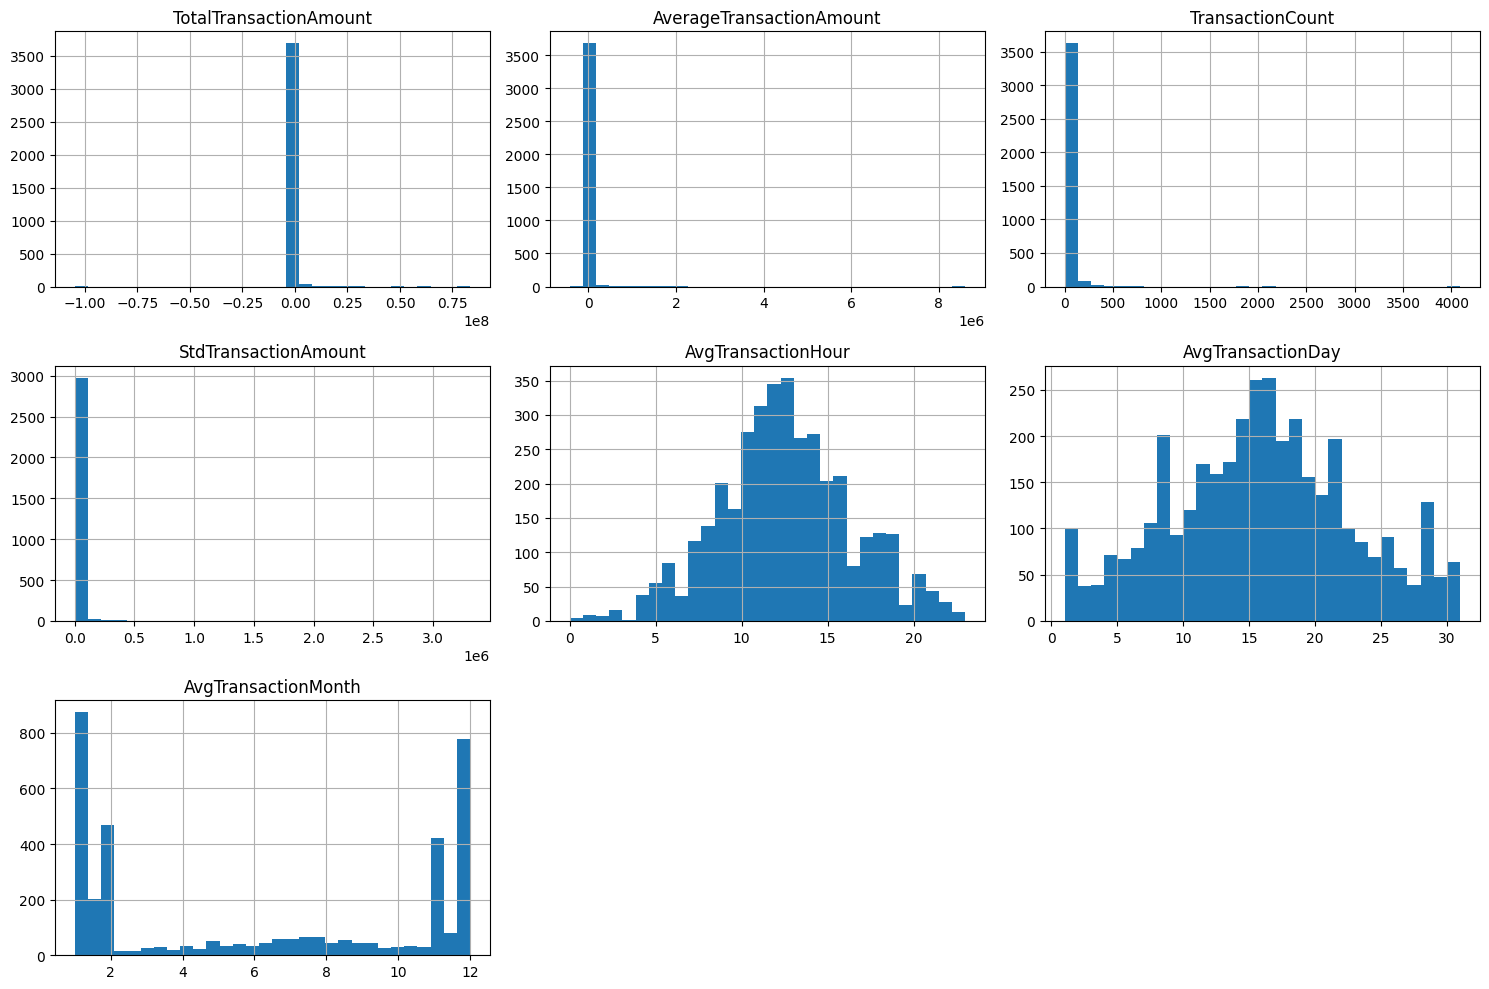

In [15]:
import matplotlib
import matplotlib.pyplot as plt

customer_df[numeric_features].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


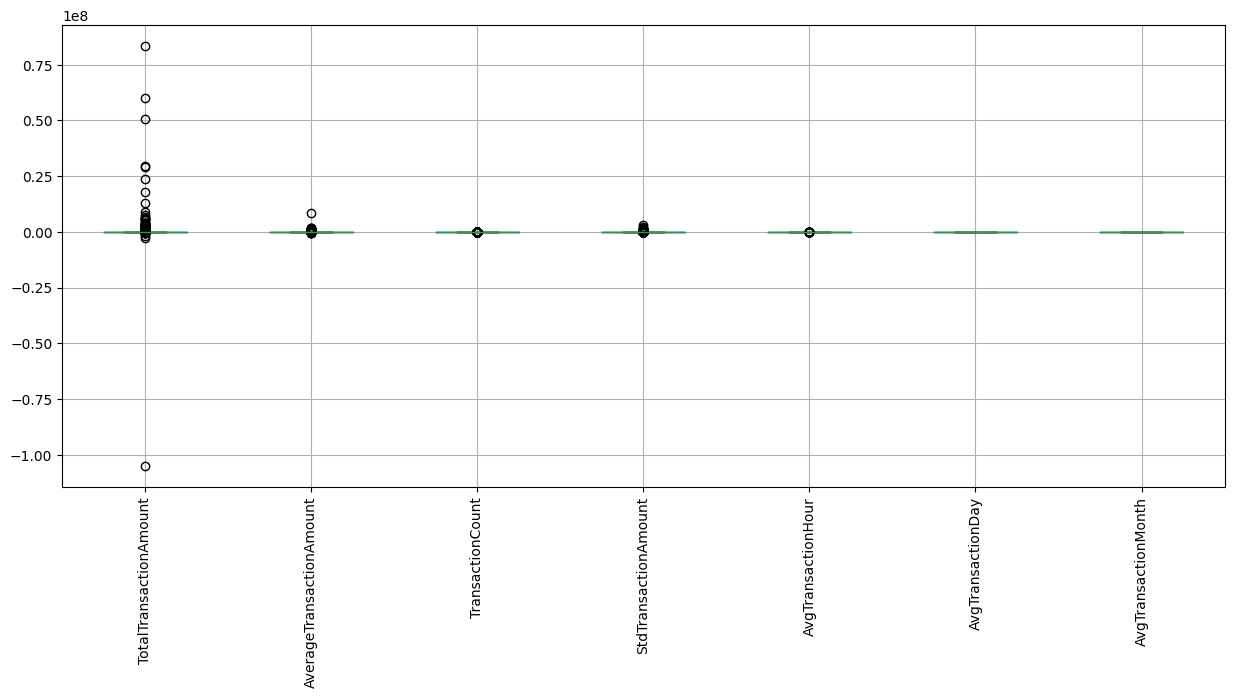

In [16]:
customer_df.boxplot(column=numeric_features, figsize=(15,6), rot=90)
plt.show()